In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('data/train.csv')
df = df.dropna()
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id;;
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199;;
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484;;
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318;;
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374;;
19,9250.0,36 months,16.49,327.45,D,D3,teaching,10+ years,OWN,18500.0,...,27.0,w,0.0,1.0,INDIVIDUAL,0.0,406.0,154326.0,3900.0,453356047;;


In [17]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

data = df.drop(['emp_title', 'home_ownership', 'pymnt_plan','record_id;;', 'earliest_cr_line', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state'], axis=1)
data['term'] = pd.factorize(data['term'])[0]
data['loan_amnt'] = data['loan_amnt'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67394 entries, 3 to 200188
Data columns (total 21 columns):
loan_amnt                     67394 non-null float64
term                          67394 non-null int64
int_rate                      67394 non-null float64
installment                   67394 non-null float64
emp_length                    67394 non-null int32
annual_inc                    67394 non-null float64
loan_status                   67394 non-null float64
dti                           67394 non-null float64
delinq_2yrs                   67394 non-null float64
inq_last_6mths                67394 non-null float64
mths_since_last_delinq        67394 non-null float64
open_acc                      67394 non-null float64
pub_rec                       67394 non-null float64
revol_bal                     67394 non-null float64
revol_util                    67394 non-null float64
total_acc                     67394 non-null float64
collections_12_mths_ex_med    67394 non-null f

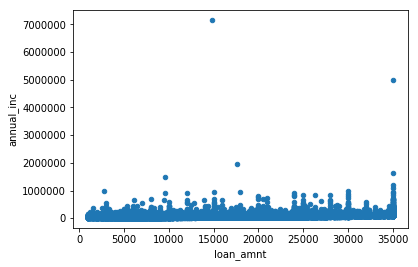

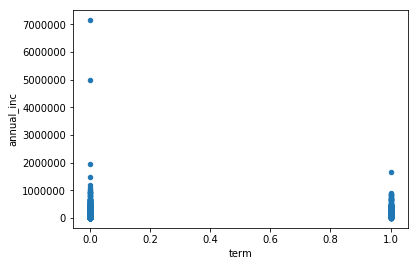

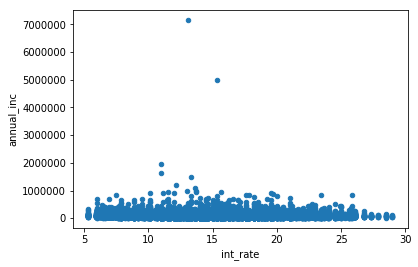

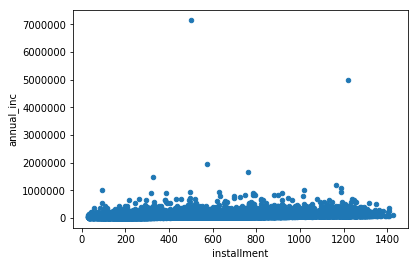

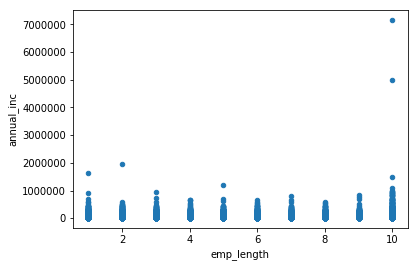

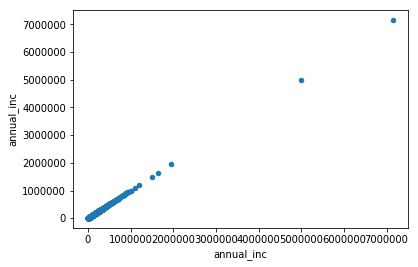

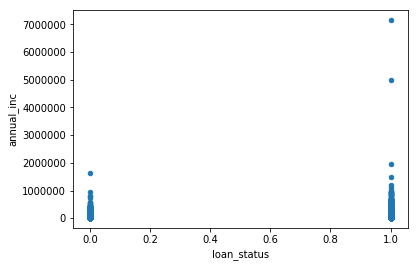

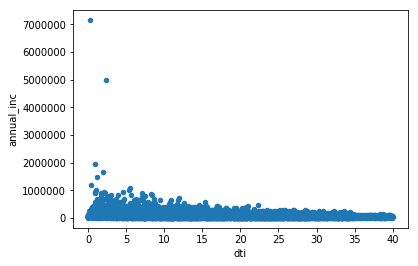

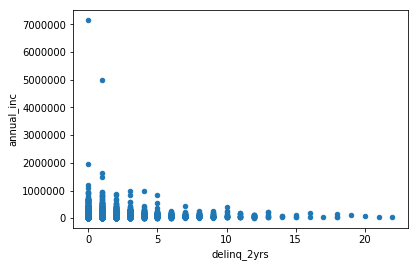

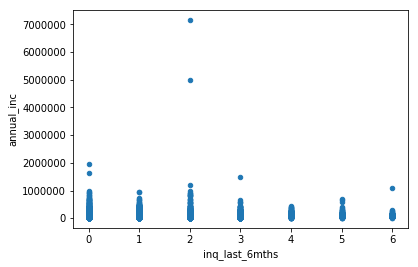

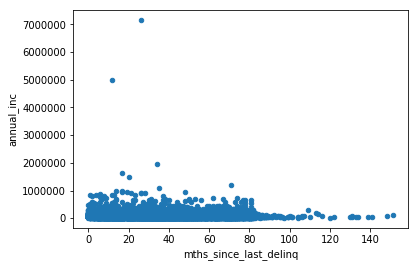

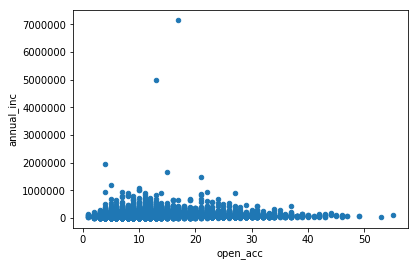

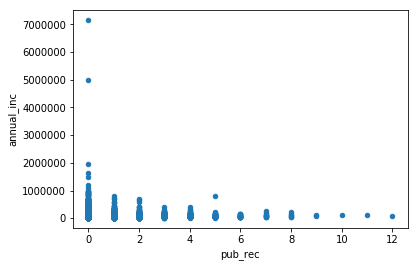

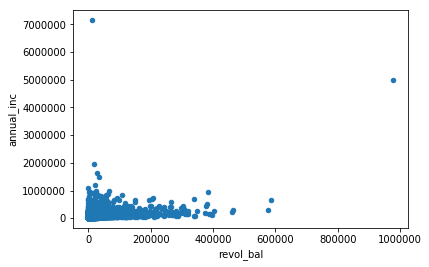

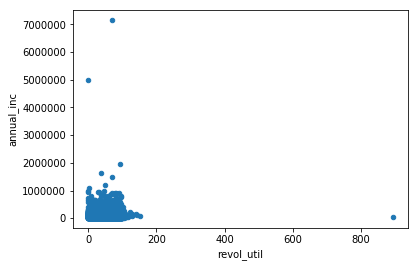

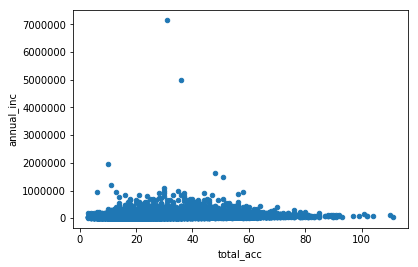

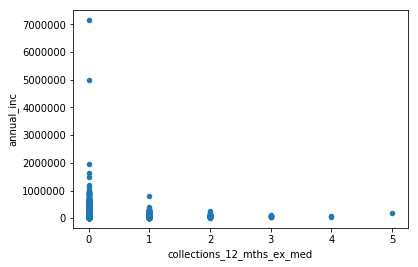

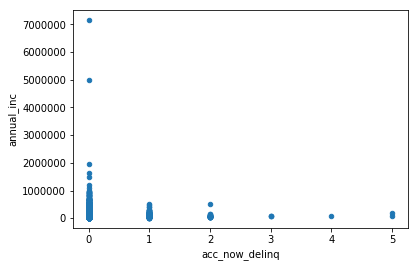

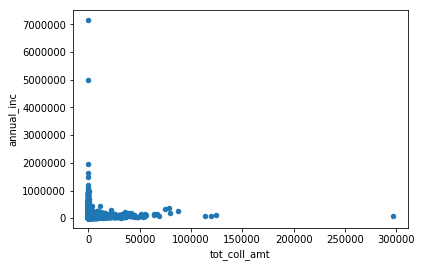

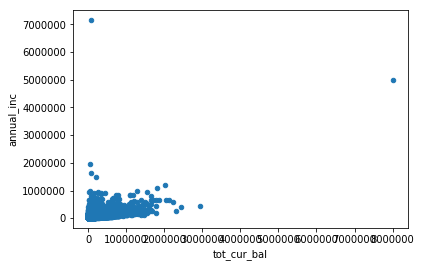

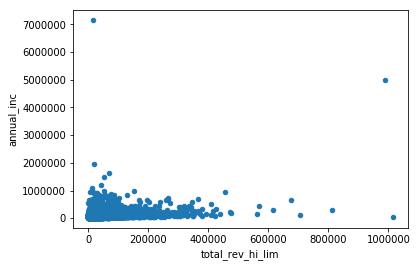

In [31]:
for idx, feature in enumerate(data.columns):
    data.plot(feature, "annual_inc", subplots=True, kind="scatter")

In [26]:
data.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.419959,0.208352,0.956052,0.071683,0.331409,-0.089541,0.014169,0.014935,-0.001927,...,0.164494,-0.084383,0.321277,0.114088,0.179453,-0.004690,0.013152,-0.014868,0.287081,0.328163
term,0.419959,1.000000,0.476416,0.180272,0.048295,0.064601,-0.162773,0.065575,0.002857,0.020894,...,0.061131,-0.018544,0.086792,0.049467,0.081164,0.009275,0.014480,-0.003611,0.103366,0.081567
int_rate,0.208352,0.476416,1.000000,0.187112,0.005571,-0.042846,-0.227400,0.138592,0.047113,0.243961,...,-0.009691,0.049780,-0.005492,0.213175,-0.036013,0.024151,0.034099,-0.000813,-0.075765,-0.133983
installment,0.956052,0.180272,0.187112,1.000000,0.062778,0.326182,-0.071719,0.012004,0.021185,0.022964,...,0.156774,-0.077059,0.312678,0.132756,0.162644,-0.004393,0.014937,-0.015103,0.259932,0.304674
emp_length,0.071683,0.048295,0.005571,0.062778,1.000000,0.042791,0.035500,0.013064,0.003425,-0.005459,...,-0.003986,0.011143,0.057776,0.041843,0.067811,-0.005284,0.008484,0.005906,0.078953,0.051782
annual_inc,0.331409,0.064601,-0.042846,0.326182,0.042791,1.000000,0.050158,-0.217314,0.047168,0.058778,...,0.103196,-0.017444,0.335633,0.044050,0.159687,0.001301,0.015735,0.008557,0.457717,0.309977
loan_status,-0.089541,-0.162773,-0.227400,-0.071719,0.035500,0.050158,1.000000,-0.137047,-0.040475,-0.041448,...,-0.026789,-0.005101,0.004155,-0.067799,0.024526,-0.015370,-0.017175,0.004510,0.058357,0.036723
dti,0.014169,0.065575,0.138592,0.012004,0.013064,-0.217314,-0.137047,1.000000,0.000412,-0.006522,...,0.268704,-0.055382,0.109052,0.155656,0.195262,-0.005199,0.010311,-0.025274,-0.045209,0.056544
delinq_2yrs,0.014935,0.002857,0.047113,0.021185,0.003425,0.047168,-0.040475,0.000412,1.000000,0.009338,...,0.052653,-0.046127,-0.008785,-0.020086,0.089934,0.041644,0.105077,-0.022012,0.063417,-0.005267
inq_last_6mths,-0.001927,0.020894,0.243961,0.022964,-0.005459,0.058778,-0.041448,-0.006522,0.009338,1.000000,...,0.115781,0.054665,-0.015990,-0.092051,0.140858,0.001517,-0.006742,0.011061,0.042169,0.015634


In [30]:
data.corrwith(data.annual_inc)

loan_amnt                     0.331409
term                          0.064601
int_rate                     -0.042846
installment                   0.326182
emp_length                    0.042791
annual_inc                    1.000000
loan_status                   0.050158
dti                          -0.217314
delinq_2yrs                   0.047168
inq_last_6mths                0.058778
mths_since_last_delinq       -0.059592
open_acc                      0.103196
pub_rec                      -0.017444
revol_bal                     0.335633
revol_util                    0.044050
total_acc                     0.159687
collections_12_mths_ex_med    0.001301
acc_now_delinq                0.015735
tot_coll_amt                  0.008557
tot_cur_bal                   0.457717
total_rev_hi_lim              0.309977
dtype: float64

In [33]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [34]:
df_shuffled = shuffle(data, random_state=123)
X = scale(df_shuffled.drop(['annual_inc'], axis=1))
y = df_shuffled['annual_inc']

C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linearregressor = LinearRegression()
linearregressor.fit(X, y)
['{1} : {0}'.format(a, b) for a, b in zip(linearregressor.coef_, df.columns)]

['loan_amnt : 12463.81480894876',
 'term : -2924.8412476180074',
 'int_rate : -1174.4053591899299',
 'installment : 28.44851997582209',
 'grade : -329.97236440341396',
 'sub_grade : 539.2088274751115',
 'emp_title : -13362.951259613232',
 'emp_length : 1032.1820101355556',
 'home_ownership : 2627.722860600545',
 'annual_inc : -530.5744692000485',
 'verification_status : -356.3131846233787',
 'issue_d : 1563.8343533655786',
 'loan_status : 10777.982242607091',
 'pymnt_plan : 49.07860560475655',
 'purpose : 3720.8208819893803',
 'zip_code : 130.72484146700623',
 'addr_state : 259.53774596128994',
 'dti : 400.2397998201379',
 'delinq_2yrs : 18065.977806224426',
 'earliest_cr_line : -1191.1670577169198']

In [38]:
from sklearn.linear_model import Lasso, Ridge

In [39]:
lassoregressor = Lasso().fit(X, y)
['{1} : {0}'.format(a, b) for a, b in zip(lassoregressor.coef_, data.columns)]

['loan_amnt : 12440.08593067025',
 'term : -2917.607818578732',
 'int_rate : -1174.520231431289',
 'installment : 48.51666166785629',
 'emp_length : -328.7199759005867',
 'annual_inc : 538.4486289291158',
 'loan_status : -13362.250104712319',
 'dti : 1031.7620378786535',
 'delinq_2yrs : 2626.0958129919272',
 'inq_last_6mths : -529.7356259524851',
 'mths_since_last_delinq : -354.7199247429085',
 'open_acc : 1562.8286641884383',
 'pub_rec : 10769.924810807353',
 'revol_bal : 50.11335693410269',
 'revol_util : 3718.432835754537',
 'total_acc : 129.7780156255319',
 'collections_12_mths_ex_med : 258.4004108732475',
 'acc_now_delinq : 399.38099551288934',
 'tot_coll_amt : 18066.216462781096',
 'tot_cur_bal : -1182.437168097076']

Text(0.5, 1.0, 'Lasso')

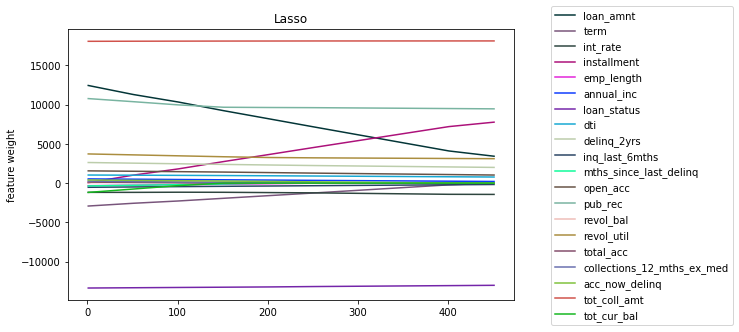

In [47]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
for i, a in enumerate(alphas):
    lasso_reg = Lasso(alpha=a).fit(X, y)
    coefs_lasso[i,:] = lasso_reg.coef_
    
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.5 , 1.1))
#plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
import matplotlib.ticker as ticker

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Выбранное alpha: 96


C:\Users\Nastassia\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


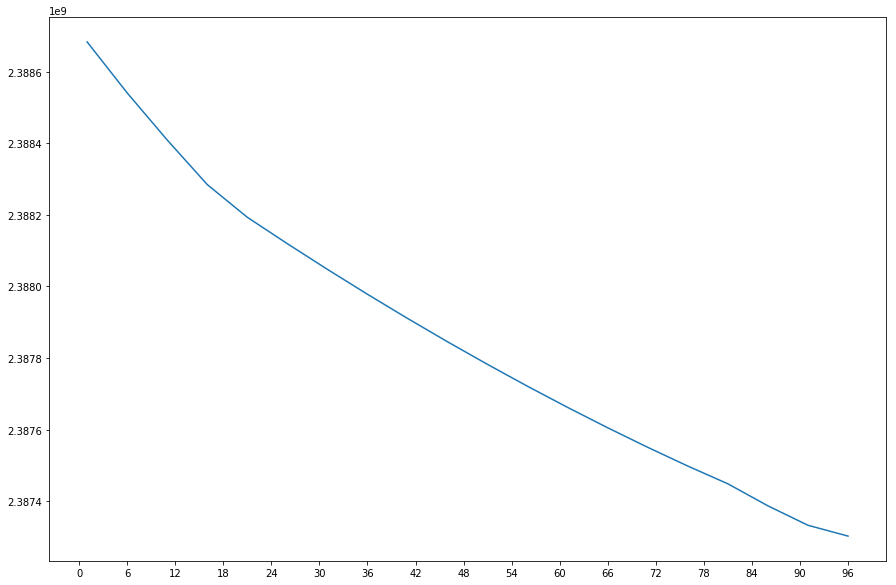

In [52]:
alphas = np.arange(1, 100, 5)
lassocv_regressor = LassoCV(alphas=alphas)
lassocv_regressor.fit(X, y)
plt.figure(figsize=(15, 10))
p = plt.plot(lassocv_regressor.alphas_, lassocv_regressor.mse_path_.mean(axis=1))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
print ('Выбранное alpha: {0}'.format(lassocv_regressor.alpha_))
zip(lassocv_regressor.coef_, data.columns)

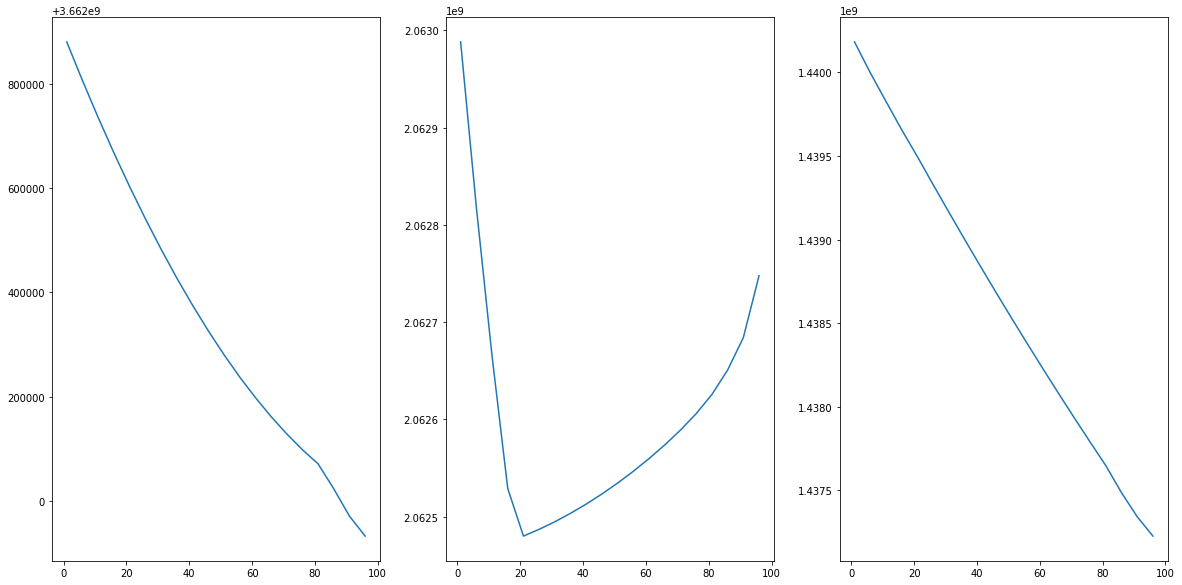

In [51]:
plt.figure(figsize=(20,10))
for x in np.arange(3):
    plt.subplot(1, 3, x+1)
    plt.plot(lassocv_regressor.alphas_, lassocv_regressor.mse_path_[:, x])